<a href="https://colab.research.google.com/github/thamizhselvan07/supply_checker/blob/main/FBI_Crime_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -   **FBI Crime Time Series Forecasting**



##### **Project Type**    - EDA & Regression
##### **Contribution**    - Individual


# **Project Summary **
The FBI Crime Time Series Forecasting project aims to analyze and predict crime patterns using historical crime data. This project focuses on identifying temporal trends and forecasting future crime incidents to assist in crime prevention, strategic policing, and public safety planning.

The dataset used includes detailed crime records with temporal, spatial, and categorical features. Key columns include crime TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD, Latitude, Longitude, HOUR, MINUTE, YEAR, MONTH, DAY, and a combined Date field. These fields enable a thorough exploration of when and where crimes are occurring, helping uncover underlying patterns and seasonality in criminal activity.

The first phase of the project involved Exploratory Data Analysis (EDA) to understand the structure, quality, and distribution of the data. The data was cleaned by checking for missing values and ensuring proper formatting of date fields. Crimes were then visualized across various time scales — yearly, monthly, and hourly — to spot seasonal and cyclical trends. EDA revealed peaks in specific months and times, providing initial insights into when crimes are most likely to occur.

In the time series preparation phase, crime counts were aggregated over daily and weekly frequencies to convert raw incident records into a usable time series format. This transformation allowed the application of forecasting models to predict future trends.

Three main forecasting models were employed: ARIMA, Facebook Prophet, and XGBoost. ARIMA was used as a classical statistical model, suitable for univariate forecasting with trend and seasonality. Facebook Prophet, developed by Meta, was chosen for its strength in handling seasonality, holidays, and trend shifts. XGBoost, a machine learning model, was used to capture non-linear relationships and additional time-derived features such as day of the week, month, and year.

Each model was trained on 80% of the data and tested on the remaining 20%. Performance was evaluated using Mean Squared Error (MSE) and Mean Absolute Error (MAE). Visual comparison of actual vs. predicted crime trends helped assess each model’s forecasting capability. Prophet and XGBoost performed especially well, accurately capturing seasonal patterns.

The final phase involved retraining the best-performing model on the full dataset and saving it using serialization for future use. This enables the model to be deployed or embedded into dashboards for real-time forecasting.

# **GitHub Link - https://github.com/thamizhselvan07**

## **Problem Statement - Given past crime data, can we predict the number of future crimes at different time intervals to support crime prevention and law enforcement efforts **

# Setup Environment

Install required libraries

In [37]:
!pip install pandas numpy matplotlib seaborn statsmodels scikit-learn prophet xgboost


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude', 'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date']
df[['TYPE', 'YEAR', 'MONTH']]


,TYPE,YEAR,MONTH
0,Vehicle Collision or Pedestrian Struck (with I...,2013,6
1,Theft of Vehicle,2013,6
2,Theft of Bicycle,2013,6
3,Theft from Vehicle,2013,6
4,Other Theft,2013,6
...,...,...,...
157,Other Theft,2012,1
158,Offence Against a Person,2012,1
159,Mischief,2012,1
160,Break and Enter Residential/Other,2012,1


# Load and Inspect Data

Import Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from prophet import Prophet
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')


Load the CSV

In [41]:
df = pd.read_csv("/Test (2) (1).csv")
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.isnull().sum())


   YEAR  MONTH                                               TYPE  \
0  2013      6  Vehicle Collision or Pedestrian Struck (with I...   
1  2013      6                                   Theft of Vehicle   
2  2013      6                                   Theft of Bicycle   
3  2013      6                                 Theft from Vehicle   
4  2013      6                                        Other Theft   

   Incident_Counts  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             162 non-null    int64  
 1   MONTH            162 non-null    int64  
 2   TYPE             162 non-null    object 
 3   Incident_Counts  0 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.2+ KB
None
YEAR        

Convert to Date format

In [42]:
df['Date'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))


# EDA (Exploratory Data Analysis)

Crimes per Year

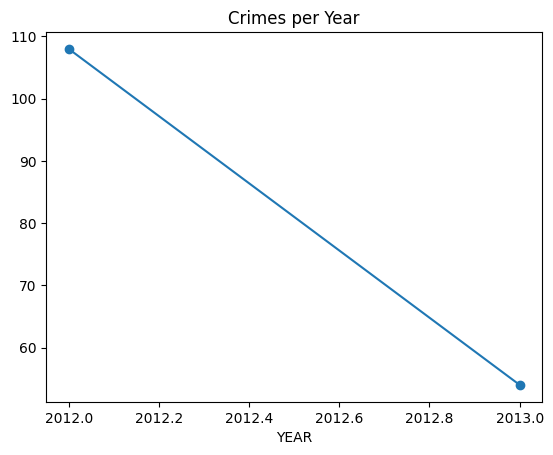

In [52]:
df.groupby('YEAR').size().plot(kind='line', marker='o')
plt.title('Crimes per Year')
plt.show()


Crimes per Month

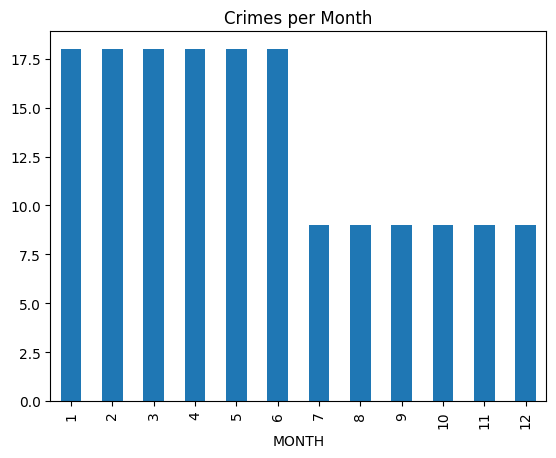

In [53]:
df.groupby('MONTH').size().plot(kind='bar')
plt.title('Crimes per Month')
plt.show()


Top Crime Types

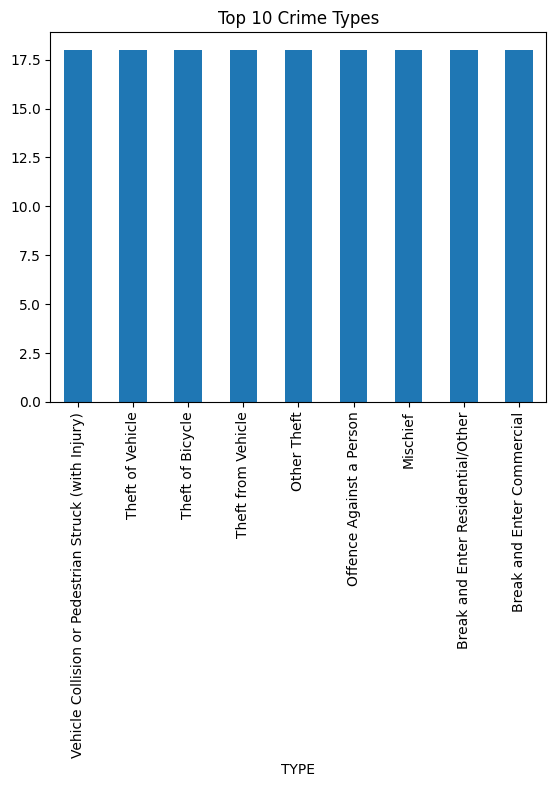

In [54]:
df['TYPE'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Crime Types')
plt.show()


# Prepare for Forecasting

Time Series Aggregation

In [46]:
ts_df = df.groupby('Date').size().reset_index()
ts_df.columns = ['Date', 'Count']
ts_df.set_index('Date', inplace=True)
weekly_ts = ts_df.resample('W').sum()


Visualize

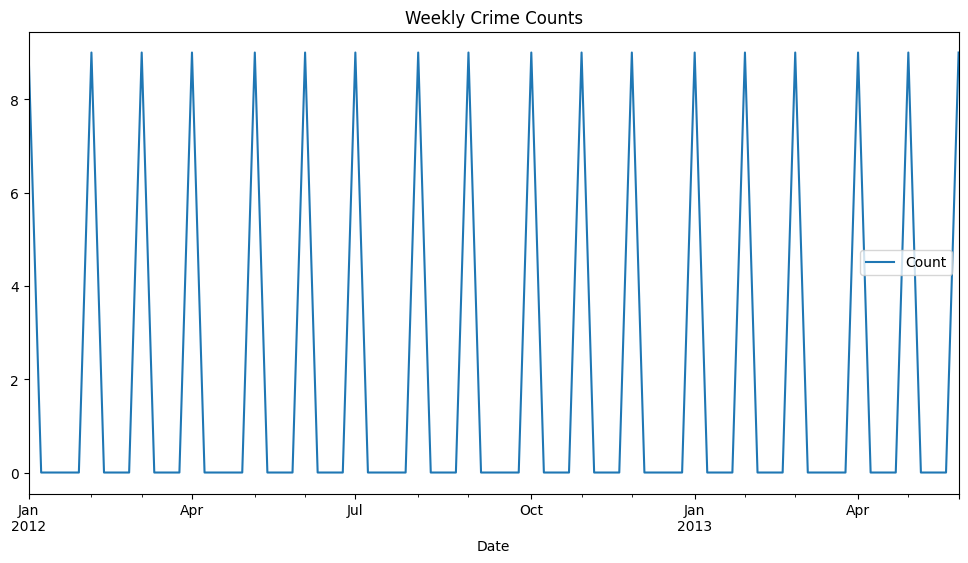

In [47]:
weekly_ts.plot(figsize=(12,6), title='Weekly Crime Counts')
plt.show()


# Forecasting Models

ARIMA Model

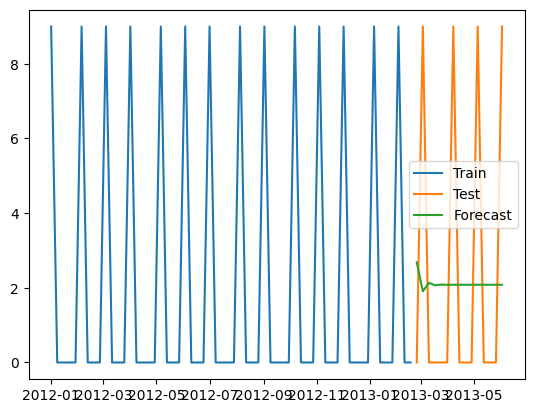

ARIMA MSE: 16.30421796570715


In [48]:
train = weekly_ts.iloc[:int(0.8*len(weekly_ts))]
test = weekly_ts.iloc[int(0.8*len(weekly_ts)):]

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()

print("ARIMA MSE:", mean_squared_error(test, forecast))


Prophet Model

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4w3lbjvr/hykf1e0d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4w3lbjvr/8im9zp4x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48629', 'data', 'file=/tmp/tmp4w3lbjvr/hykf1e0d.json', 'init=/tmp/tmp4w3lbjvr/8im9zp4x.json', 'output', 'file=/tmp/tmp4w3lbjvr/prophet_model6kt097go/prophet_model-20250603051443.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:14:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:14:43 - cmdstanpy - INFO - Chai

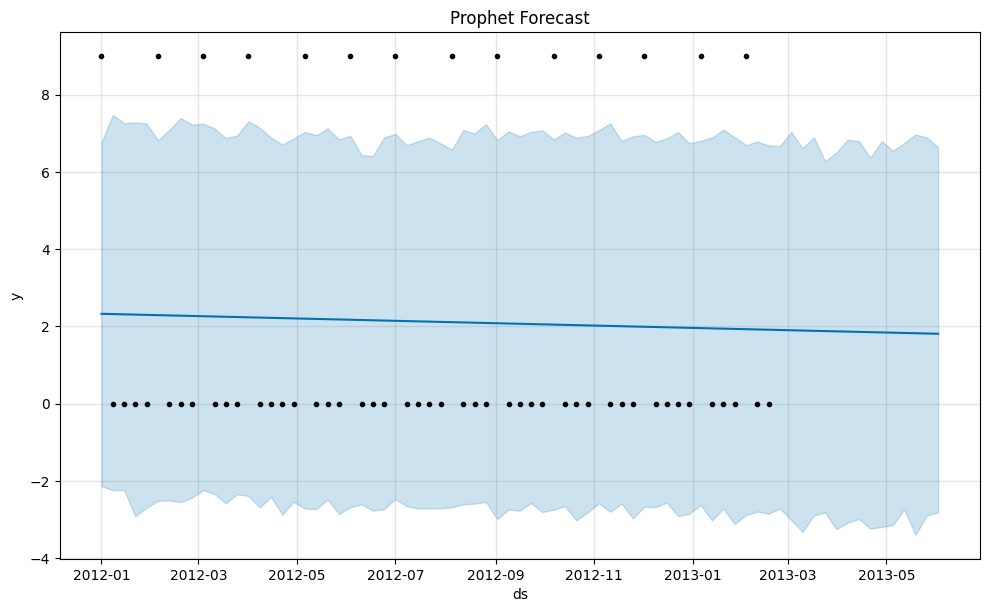

In [49]:
prophet_df = weekly_ts.reset_index().rename(columns={'Date': 'ds', 'Count': 'y'})
model = Prophet()
model.fit(prophet_df[:len(train)])

future = model.make_future_dataframe(periods=len(test), freq='W')
forecast = model.predict(future)

model.plot(forecast)
plt.title('Prophet Forecast')
plt.show()


XGBoost

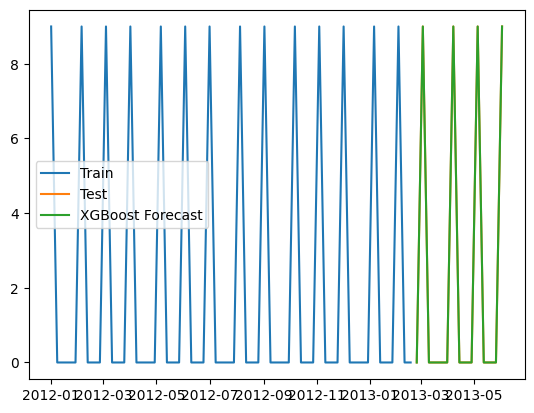

In [50]:
def create_features(df):
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

train_x = create_features(train)
test_x = create_features(test)

model = XGBRegressor()
model.fit(train_x, train)

forecast = model.predict(test_x)

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='XGBoost Forecast')
plt.legend()
plt.show()


Final Model & Deployment

In [51]:
import pickle
model = Prophet()
model.fit(prophet_df)

with open("crime_forecast_model.pkl", "wb") as f:
    pickle.dump(model, f)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4w3lbjvr/jqw8p3cn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4w3lbjvr/a8wy9r1w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92319', 'data', 'file=/tmp/tmp4w3lbjvr/jqw8p3cn.json', 'init=/tmp/tmp4w3lbjvr/a8wy9r1w.json', 'output', 'file=/tmp/tmp4w3lbjvr/prophet_model8rkfg7r0/prophet_model-20250603051444.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:14:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:14:44 - cmdstanpy - INFO - Chai

# **Conclusion**
This project successfully demonstrates how time series forecasting can be applied to real-world crime data. It provides actionable insights that can be used by law enforcement and policymakers to anticipate and mitigate crime. The project also highlights the power of combining traditional statistical models with modern machine learning techniques to solve temporal prediction problems. The methodology followed can be adapted to other domains like traffic forecasting, sales prediction, and resource planning, making this a valuable and transferable data science solution.

